<a href="https://colab.research.google.com/github/jaimegarciasdr9/module_structure/blob/main/segmentation_hierarchical_clsutering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import the file and change to YOUR proper path csv_file_path ='**/content/drive/MyDrive/cities.csv**'

In [2]:
# Specify the path to the Excel file
excel_file_path = '/content/Bddatos.caso1.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Display the first few rows of the DataFrame
df.head()

,Edad,Sexo,Ingresos Anuales (en miles de euros),Frecuencia Deporte,Comer Fuera Durante Semana,Comer Fuera los Fines de Semana,Cenar Fuera Durante Semana,Cenar Fuera los Fines de Semana,Cena Solo Durante Semana,Cena Solo los Fines de Semana
0,30,M,40,4,4,3,2,2,1,1
1,25,F,35,5,5,4,3,3,2,2
2,45,M,60,3,3,2,1,1,1,1
3,35,F,45,4,4,3,2,2,2,2
4,40,M,55,5,5,4,3,3,1,1


In [3]:
# column names
column_names=df.columns
print(column_names)

Index(['Edad', 'Sexo', 'Ingresos Anuales (en miles de euros)',
       'Frecuencia Deporte', 'Comer Fuera Durante Semana',
       'Comer Fuera los Fines de Semana', 'Cenar Fuera Durante Semana',
       'Cenar Fuera los Fines de Semana', 'Cena Solo Durante Semana',
       'Cena Solo los Fines de Semana'],
      dtype='object')


In [4]:
# Select the columns you want to normalize
columns_to_normalize = ['Edad', 'Ingresos Anuales (en miles de euros)', 'Frecuencia Deporte', 'Comer Fuera Durante Semana',
       'Comer Fuera los Fines de Semana', 'Cenar Fuera Durante Semana',
       'Cenar Fuera los Fines de Semana', 'Cena Solo Durante Semana',
       'Cena Solo los Fines de Semana']
# Initialize the Standard Scaler
scaler = StandardScaler()

# Compute mean and standard deviation for the selected columns
mean = df[columns_to_normalize].mean()
std = df[columns_to_normalize].std()
mean_list=mean.tolist()
std_list=std.tolist()

# Normalize the selected columns using mean and standard deviation
df[columns_to_normalize] = (df[columns_to_normalize] - mean) / std


In [6]:
# Extract multiple columns using a list of column names
df_s = df[['Edad', 'Ingresos Anuales (en miles de euros)', 'Frecuencia Deporte', 'Comer Fuera Durante Semana',
       'Comer Fuera los Fines de Semana', 'Cenar Fuera Durante Semana',
       'Cenar Fuera los Fines de Semana', 'Cena Solo Durante Semana',
       'Cena Solo los Fines de Semana']]  # Extracts
df_s.head()

,Edad,Ingresos Anuales (en miles de euros),Frecuencia Deporte,Comer Fuera Durante Semana,Comer Fuera los Fines de Semana,Cenar Fuera Durante Semana,Cenar Fuera los Fines de Semana,Cena Solo Durante Semana,Cena Solo los Fines de Semana
0,-1.072580,-1.047504,0.000000,0.000000,0.000000,0.000000,0.000000,-0.987421,-0.987421
1,-1.685483,-1.471594,1.396424,1.396424,1.396424,1.396424,1.396424,0.987421,0.987421
2,0.766129,0.648859,-1.396424,-1.396424,-1.396424,-1.396424,-1.396424,-0.987421,-0.987421
3,-0.459677,-0.623413,0.000000,0.000000,0.000000,0.000000,0.000000,0.987421,0.987421
4,0.153226,0.224768,1.396424,1.396424,1.396424,1.396424,1.396424,-0.987421,-0.987421


In [7]:
# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(df_s, method='ward')

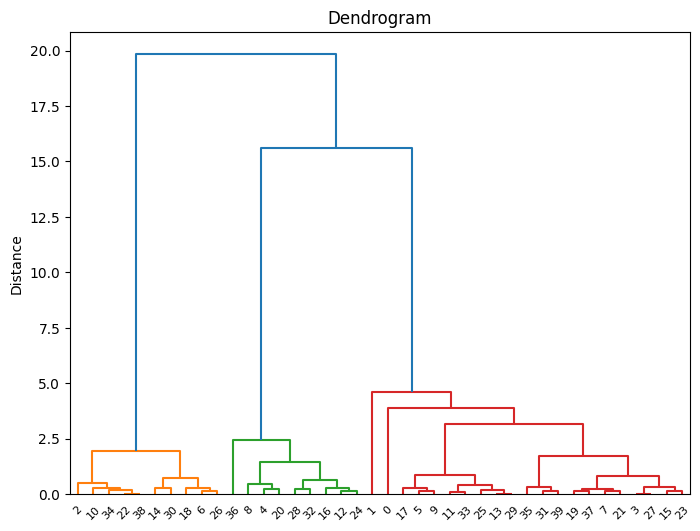

In [8]:
# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, orientation='top')
plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()


In [9]:
# Select the number of clusters based on the dendrogram
num_clusters = 6  # Adjust this based on the dendrogram

# Perform hierarchical clustering with the selected number of clusters

agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
df_s['Cluster'] = agg_cluster.fit_predict(df_s)

# Display the DataFrame with cluster assignments
print(df_s)

        Edad  Ingresos Anuales (en miles de euros)  Frecuencia Deporte  \
0  -1.072580                             -1.047504            0.000000   
1  -1.685483                             -1.471594            1.396424   
2   0.766129                              0.648859           -1.396424   
3  -0.459677                             -0.623413            0.000000   
4   0.153226                              0.224768            1.396424   
5  -1.317742                             -1.217140            0.000000   
6   1.379032                              1.497040           -1.396424   
7  -0.704839                             -0.877867            0.000000   
8  -0.091935                             -0.199323            1.396424   
9  -1.440322                             -1.301958            0.000000   
10  1.133871                              1.072949           -1.396424   
11 -0.950000                             -0.962686            0.000000   
12  0.398387                          